# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from nltk.probability import FreqDist

In [2]:
#set path
os.chdir("C://Users//Sean//Desktop//excel_data")
df = pd.read_csv("14_4_2020_web_scraping.csv", index_col = 0)

In [3]:
pd.set_option("display.max_colwidth", 100)
df.head()

date                drug_name      condition  rating  \
0     March 21, 2019                 Abacavir  HIV Infection       1   
1  September 1, 2019  Abacavir and lamivudine  HIV Infection       7   
2    August 10, 2019  Abacavir and lamivudine  HIV Infection      10   
3    August 16, 2013  Abacavir and lamivudine  HIV Infection      10   
4     March 16, 2013  Abacavir and lamivudine  HIV Infection      10   

                                                                                               comment  
0  "Sorry to say this drug Abacavir definitely had a very bad unpleasant stressful adverse  effect ...  
1  "taking this combo for 2 months now together with rezolsta\n(darunavir/cobicistat)\nfeeling naus...  
2  "My wife and I have been on  Epzicom since 2000 along with viramune it   works  no side effects ...  
3  "Epzicom Reyataz AND Norvir triple combination.  It is expensive but ALL hiv medications are exp...  
4  "I've used this since first diagnosed and starting HAART in 2004 and it's worked extremely well:...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177779 entries, 0 to 177778
Data columns (total 5 columns):
date         177779 non-null object
drug_name    177779 non-null object
condition    177779 non-null object
rating       177779 non-null int64
comment      177779 non-null object
dtypes: int64(1), object(4)
memory usage: 8.1+ MB


In [5]:
df.shape

(177779, 5)

In [6]:
df.describe(include="all")

date         drug_name      condition         rating  \
count             177779            177779         177779  177779.000000   
unique              4540              2668            880            NaN   
top     November 4, 2019  FusePaq Fanatrex  Birth Control            NaN   
freq                 176              1842           9960            NaN   
mean                 NaN               NaN            NaN       6.008803   
std                  NaN               NaN            NaN       3.799016   
min                  NaN               NaN            NaN       0.000000   
25%                  NaN               NaN            NaN       1.000000   
50%                  NaN               NaN            NaN       8.000000   
75%                  NaN               NaN            NaN      10.000000   
max                  NaN               NaN            NaN      10.000000   

       comment  
count   177779  
unique  125849  
top     "Good"  
freq        30  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN

In [7]:
# see all column names
list(df.columns)

['date', 'drug_name', 'condition', 'rating', 'comment']

In [8]:
# convert date format and check earliest and latest dates
df['date'] = pd.to_datetime(df['date'])
oldest_date = df['date'].min()
latest_date = df['date'].max()
print(oldest_date)
print(latest_date)

2007-02-16 00:00:00
2020-04-09 00:00:00


In [9]:
#check null 
df.isnull().sum()/df.shape[0]

date         0.0
drug_name    0.0
condition    0.0
rating       0.0
comment      0.0
dtype: float64

In [10]:
# check total drugs
print(len(df.drug_name.unique()))

2668


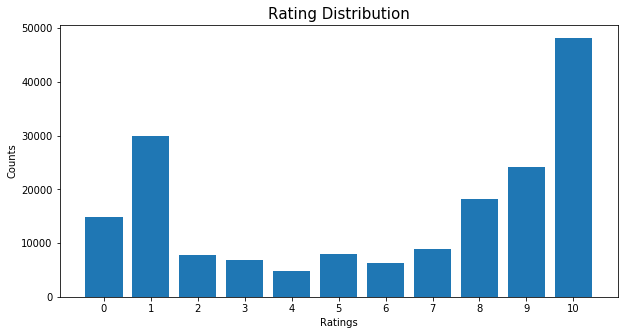

In [11]:
#rating distribution
plt.figure(figsize=(10,5))
ratings = df.rating.value_counts(ascending = False)
plt.bar(ratings.index, ratings.values)
plt.title('Rating Distribution', fontsize = 15)
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(range(11))
plt.savefig('Rating Distribution.png')

In [16]:
ratings

10    48164
1     29934
9     24067
8     18125
0     14841
7      8845
5      8050
2      7858
3      6815
6      6208
4      4872
Name: rating, dtype: int64

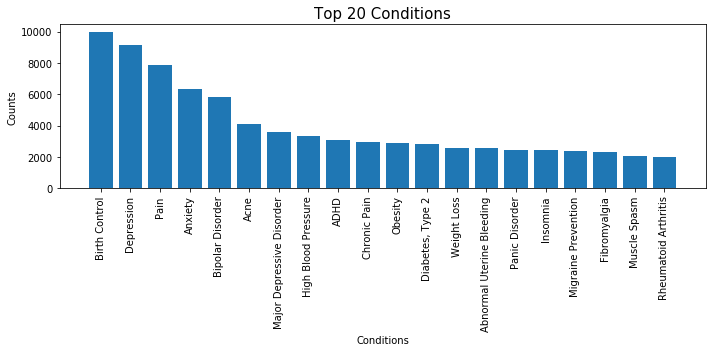

In [14]:
#top 20 conditions
plt.figure(figsize=(10,5))
conditions = df.condition.value_counts(ascending = False).head(20)
plt.bar(conditions.index, conditions.values)
plt.title('Top 20 Conditions', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.xlabel('Conditions')
plt.tight_layout()
plt.tight_layout()
plt.savefig('Top 20 Conditions Distribution.png')

In [15]:
conditions

Birth Control                9960
Depression                   9128
Pain                         7878
Anxiety                      6330
Bipolar Disorder             5819
Acne                         4102
Major Depressive Disorder    3602
High Blood Pressure          3330
ADHD                         3098
Chronic Pain                 2960
Obesity                      2872
Diabetes, Type 2             2829
Weight Loss                  2569
Abnormal Uterine Bleeding    2567
Panic Disorder               2461
Insomnia                     2453
Migraine Prevention          2408
Fibromyalgia                 2327
Muscle Spasm                 2084
Rheumatoid Arthritis         1980
Name: condition, dtype: int64

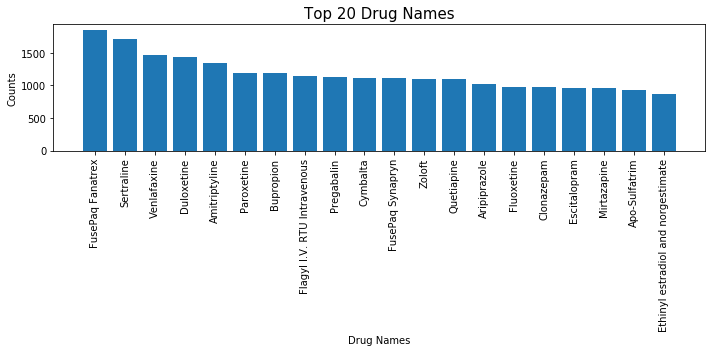

In [17]:
#top 20 drug names
plt.figure(figsize=(10,5))
top_20_drug_names = df.drug_name.value_counts(ascending = False).head(20)
plt.bar(top_20_drug_names.index, top_20_drug_names.values)
plt.title('Top 20 Drug Names', fontsize = 15)
plt.xticks(rotation=90)
plt.xlabel('Drug Names')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('Top 20 Drugs Distribution.png')

In [18]:
top_20_drug_names

FusePaq Fanatrex                      1842
Sertraline                            1718
Venlafaxine                           1465
Duloxetine                            1437
Amitriptyline                         1341
Paroxetine                            1188
Bupropion                             1187
Flagyl I.V. RTU Intravenous           1140
Pregabalin                            1125
Cymbalta                              1116
FusePaq Synapryn                      1116
Zoloft                                1104
Quetiapine                            1102
Aripiprazole                          1015
Fluoxetine                             979
Clonazepam                             973
Escitalopram                           965
Mirtazapine                            962
Apo-Sulfatrim                          924
Ethinyl estradiol and norgestimate     875
Name: drug_name, dtype: int64

In [19]:
rating_distribution = df.rating.value_counts().sort_values(ascending=False).reset_index()
rating_distribution.columns = ["rating", "counts"]
rating_distribution["percent"] = (rating_distribution["counts"]/df.shape[0]) * 100
print(rating_distribution)

    rating  counts    percent
0       10   48164  27.092064
1        1   29934  16.837759
2        9   24067  13.537594
3        8   18125  10.195242
4        0   14841   8.348005
5        7    8845   4.975278
6        5    8050   4.528094
7        2    7858   4.420095
8        3    6815   3.833411
9        6    6208   3.491976
10       4    4872   2.740481


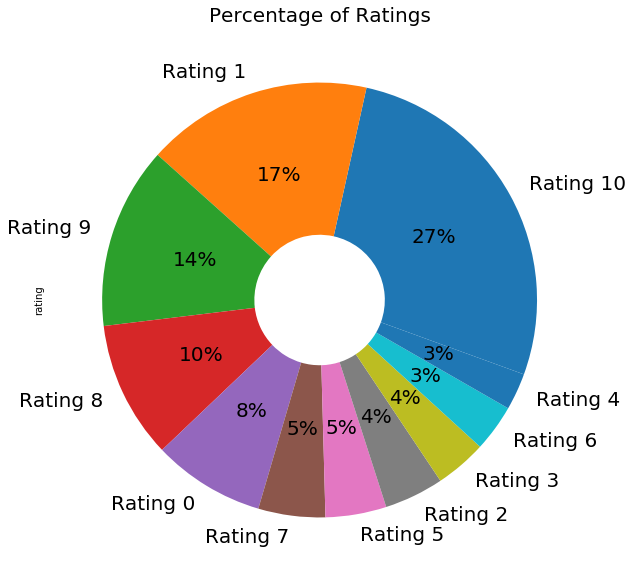

In [20]:
#donut chart percentage of ratings
x = df.rating.value_counts()
rating_array = list(x.index.astype(str))

for index, rating in enumerate(rating_array):
    rating_array[index] = "Rating " + rating
    
plt.figure(figsize=(30,10))
plt.title("Percentage of Ratings", fontsize=20)
df.rating.value_counts().plot(kind="pie", labels=rating_array,
                              wedgeprops=dict(width=.7), autopct="%1.0f%%", startangle=-20,
                              textprops={"fontsize": 20})

In [21]:
#no of drug for condition
drug_per_condition = df.groupby('condition')['drug_name'].nunique().sort_values(ascending=False).head(20)
drug_per_condition

condition
Pain                         200
Rheumatoid Arthritis         107
High Blood Pressure          105
Depression                    96
Acne                          93
Birth Control                 91
Osteoarthritis                79
Psoriasis                     74
Allergic Rhinitis             72
Abnormal Uterine Bleeding     69
Anxiety                       68
Endometriosis                 62
Diabetes, Type 2              60
Chronic Pain                  57
Bipolar Disorder              54
Major Depressive Disorder     54
Dermatitis                    52
Bronchitis                    50
Bacterial Infection           49
Urinary Tract Infection       48
Name: drug_name, dtype: int64

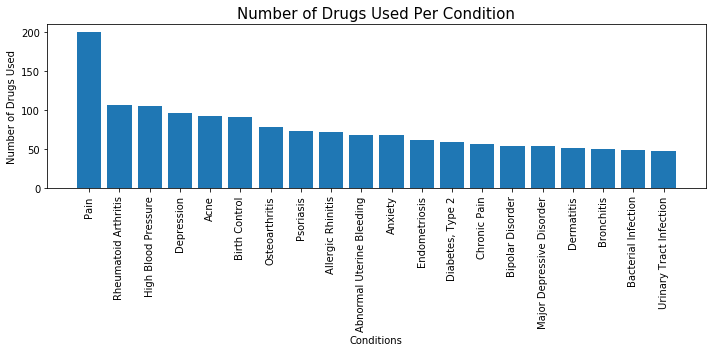

In [62]:
#number of drugs used per condition
plt.figure(figsize=(10,5))
plt.bar(drug_per_condition.index, drug_per_condition.values)
plt.title('Number of Drugs Used Per Condition', fontsize = 15)
plt.xticks(rotation=90)
plt.xlabel('Conditions')
plt.ylabel('Number of Drugs Used')
plt.tight_layout()
plt.tight_layout()
plt.savefig('Number of Drugs Used Per Condition.png')

In [60]:
drug_for_multiple_cond = df.groupby('drug_name')['condition'].nunique().sort_values(ascending=False).head(20)
print(drug_for_multiple_cond)

drug_name
Prednisone                                       42
FusePaq Fanatrex                                 33
Adox Pak 2/100                                   28
Flagyl I.V. RTU Intravenous                      25
Ciprofloxacin                                    25
Amitriptyline                                    24
Azithromycin                                     22
Venlafaxine                                      22
Arze-Ject-A                                      21
Dexamethasone                                    20
Clarithromycin                                   19
Atoma Children's Ibuprofen Suspension - Berry    19
Naprelan 500                                     19
Apo-Sulfatrim                                    18
Clonazepam                                       18
Cipro                                            18
Duloxetine                                       17
Risperidone                                      17
Fluoxetine                                       17
Ca

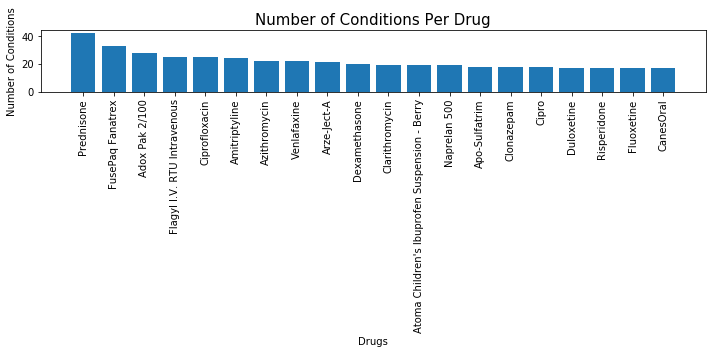

In [65]:
#number of conditions per drug
plt.figure(figsize=(10,5))
plt.bar(drug_for_multiple_cond.index, drug_for_multiple_cond.values)
plt.title('Number of Conditions Per Drug', fontsize = 15)
plt.xticks(rotation=90)
plt.xlabel('Drugs')
plt.ylabel('Number of Conditions')
plt.tight_layout()
plt.savefig('Number of Conditions Per Drug.png')

In [66]:
top_ratings = df[df['rating'] == 10]['drug_name'].value_counts().head(20)
print(top_ratings)

FusePaq Fanatrex    528
Sertraline          471
Amitriptyline       445
Clonazepam          403
Alprazolam          379
Propranolol         365
Bupropion           351
Venlafaxine         344
FusePaq Synapryn    339
Zoloft              323
Paroxetine          310
Fluoxetine          305
Pregabalin          294
Xanax               287
Duloxetine          284
Quetiapine          284
Diskets             269
Escitalopram        258
Lamotrigine         256
Prednisone          244
Name: drug_name, dtype: int64


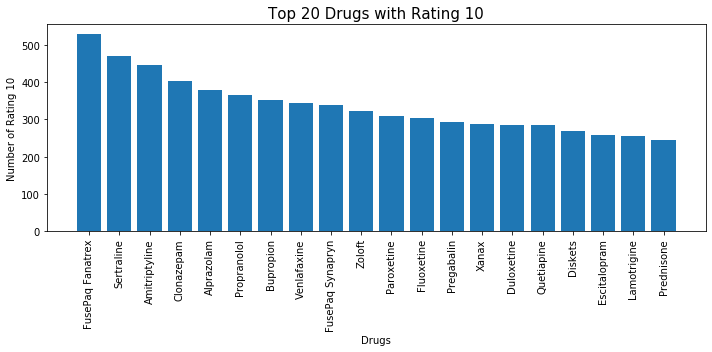

In [69]:
#top 20 drugs with rating 10
plt.figure(figsize=(10,5))
plt.bar(top_ratings.index, top_ratings.values)
plt.title('Top 20 Drugs with Rating 10', fontsize = 15)
plt.xticks(rotation=90)
plt.xlabel('Drugs')
plt.ylabel('Number of Rating 10')
plt.tight_layout()
plt.savefig('Top 20 Drugs with Rating 10.png')

In [70]:
low_ratings = df[df['rating'] == 0]['drug_name'].value_counts().head(20)
print(low_ratings)

Flagyl I.V. RTU Intravenous    147
FusePaq Fanatrex               136
Sertraline                     117
Venlafaxine                    115
Amitriptyline                  107
Duloxetine                     101
Phentermine                     88
Topiramate                      83
Adox Pak 2/100                  82
Pregabalin                      80
Clonazepam                      78
Liraglutide                     78
Paroxetine                      76
Escitalopram                    76
Bupropion                       75
Cymbalta                        75
Mirtazapine                     73
Quetiapine                      73
Fluoxetine                      71
Lorcaserin                      70
Name: drug_name, dtype: int64


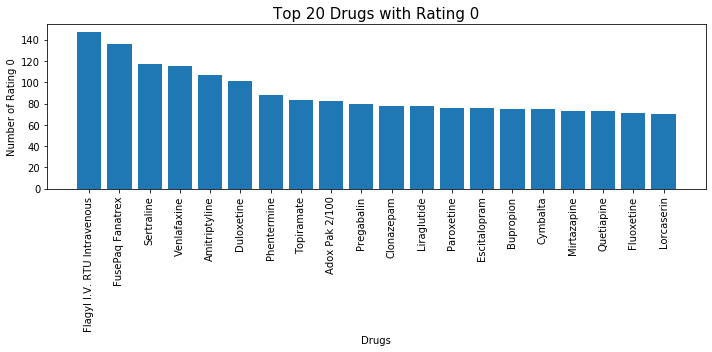

In [71]:
#top 20 drugs with rating 0
plt.figure(figsize=(10,5))
plt.bar(low_ratings.index, low_ratings.values)
plt.title('Top 20 Drugs with Rating 0', fontsize = 15)
plt.xticks(rotation=90)
plt.xlabel('Drugs')
plt.ylabel('Number of Rating 0')
plt.tight_layout()
plt.savefig('Top 20 Drugs with Rating 0.png')

In [12]:
year_of_date = pd.DatetimeIndex(df.date).year
month_of_date = pd.DatetimeIndex(df.date).month

In [13]:
year_values = year_of_date.value_counts().sort_index()
print(year_values)

2007      183
2008     4127
2009     8806
2010     5674
2011     7615
2012     6494
2013     8249
2014     7696
2015    15491
2016    22214
2017    22433
2018    23608
2019    35587
2020     9602
Name: date, dtype: int64


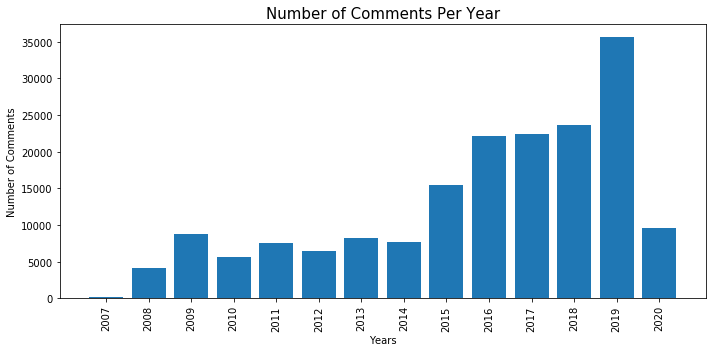

In [14]:
#number of comments per year
plt.figure(figsize=(10,5))
plt.bar(year_values.index, year_values.values)
plt.title('Number of Comments Per Year', fontsize = 15)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.xticks(range(2007,2021))
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.savefig('Number of Comments Per Year.png')

In [111]:
month_values = month_of_date.value_counts().sort_index()
print(month_values)

1     16767
2     15466
3     15288
4     13426
5     13041
6     13260
7     14826
8     16113
9     15201
10    15389
11    14701
12    14301
Name: date, dtype: int64


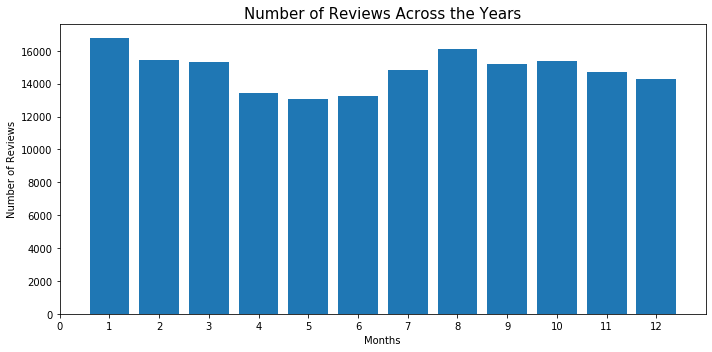

In [115]:
#number of reviews across the years
plt.figure(figsize=(10,5))
plt.bar(month_values.index, month_values.values)
plt.title('Number of Reviews Across the Years', fontsize = 15)
plt.xlabel('Months')
plt.xticks(range(13))
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.savefig('Number of Reviews Across the Years.png')

In [17]:
df["review_length"] = ""
for index, review in enumerate(df.comment):
    df.review_length[index] = len(review.split())

In [18]:
#minimum review length
min_len = df.review_length.min()
df[df["review_length"]==min_len]

date         drug_name  condition  rating comment  review_length
44577 2016-10-19        Clonazepam    Anxiety       8     "I"              3
93241 2014-02-23  Keppra Injection  Neuralgia       9     "I"              3

In [19]:
#maximum review length
max_len = df.review_length.max()
df[df["review_length"]==max_len]

date    drug_name condition  rating  \
166482 2017-06-18  Venlafaxine  Migraine       2   

                                                                                                    comment  \
166482  "Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\nIt d...   

        review_length  
166482          10310

In [57]:
text = " ".join(comment for comment in df.comment)

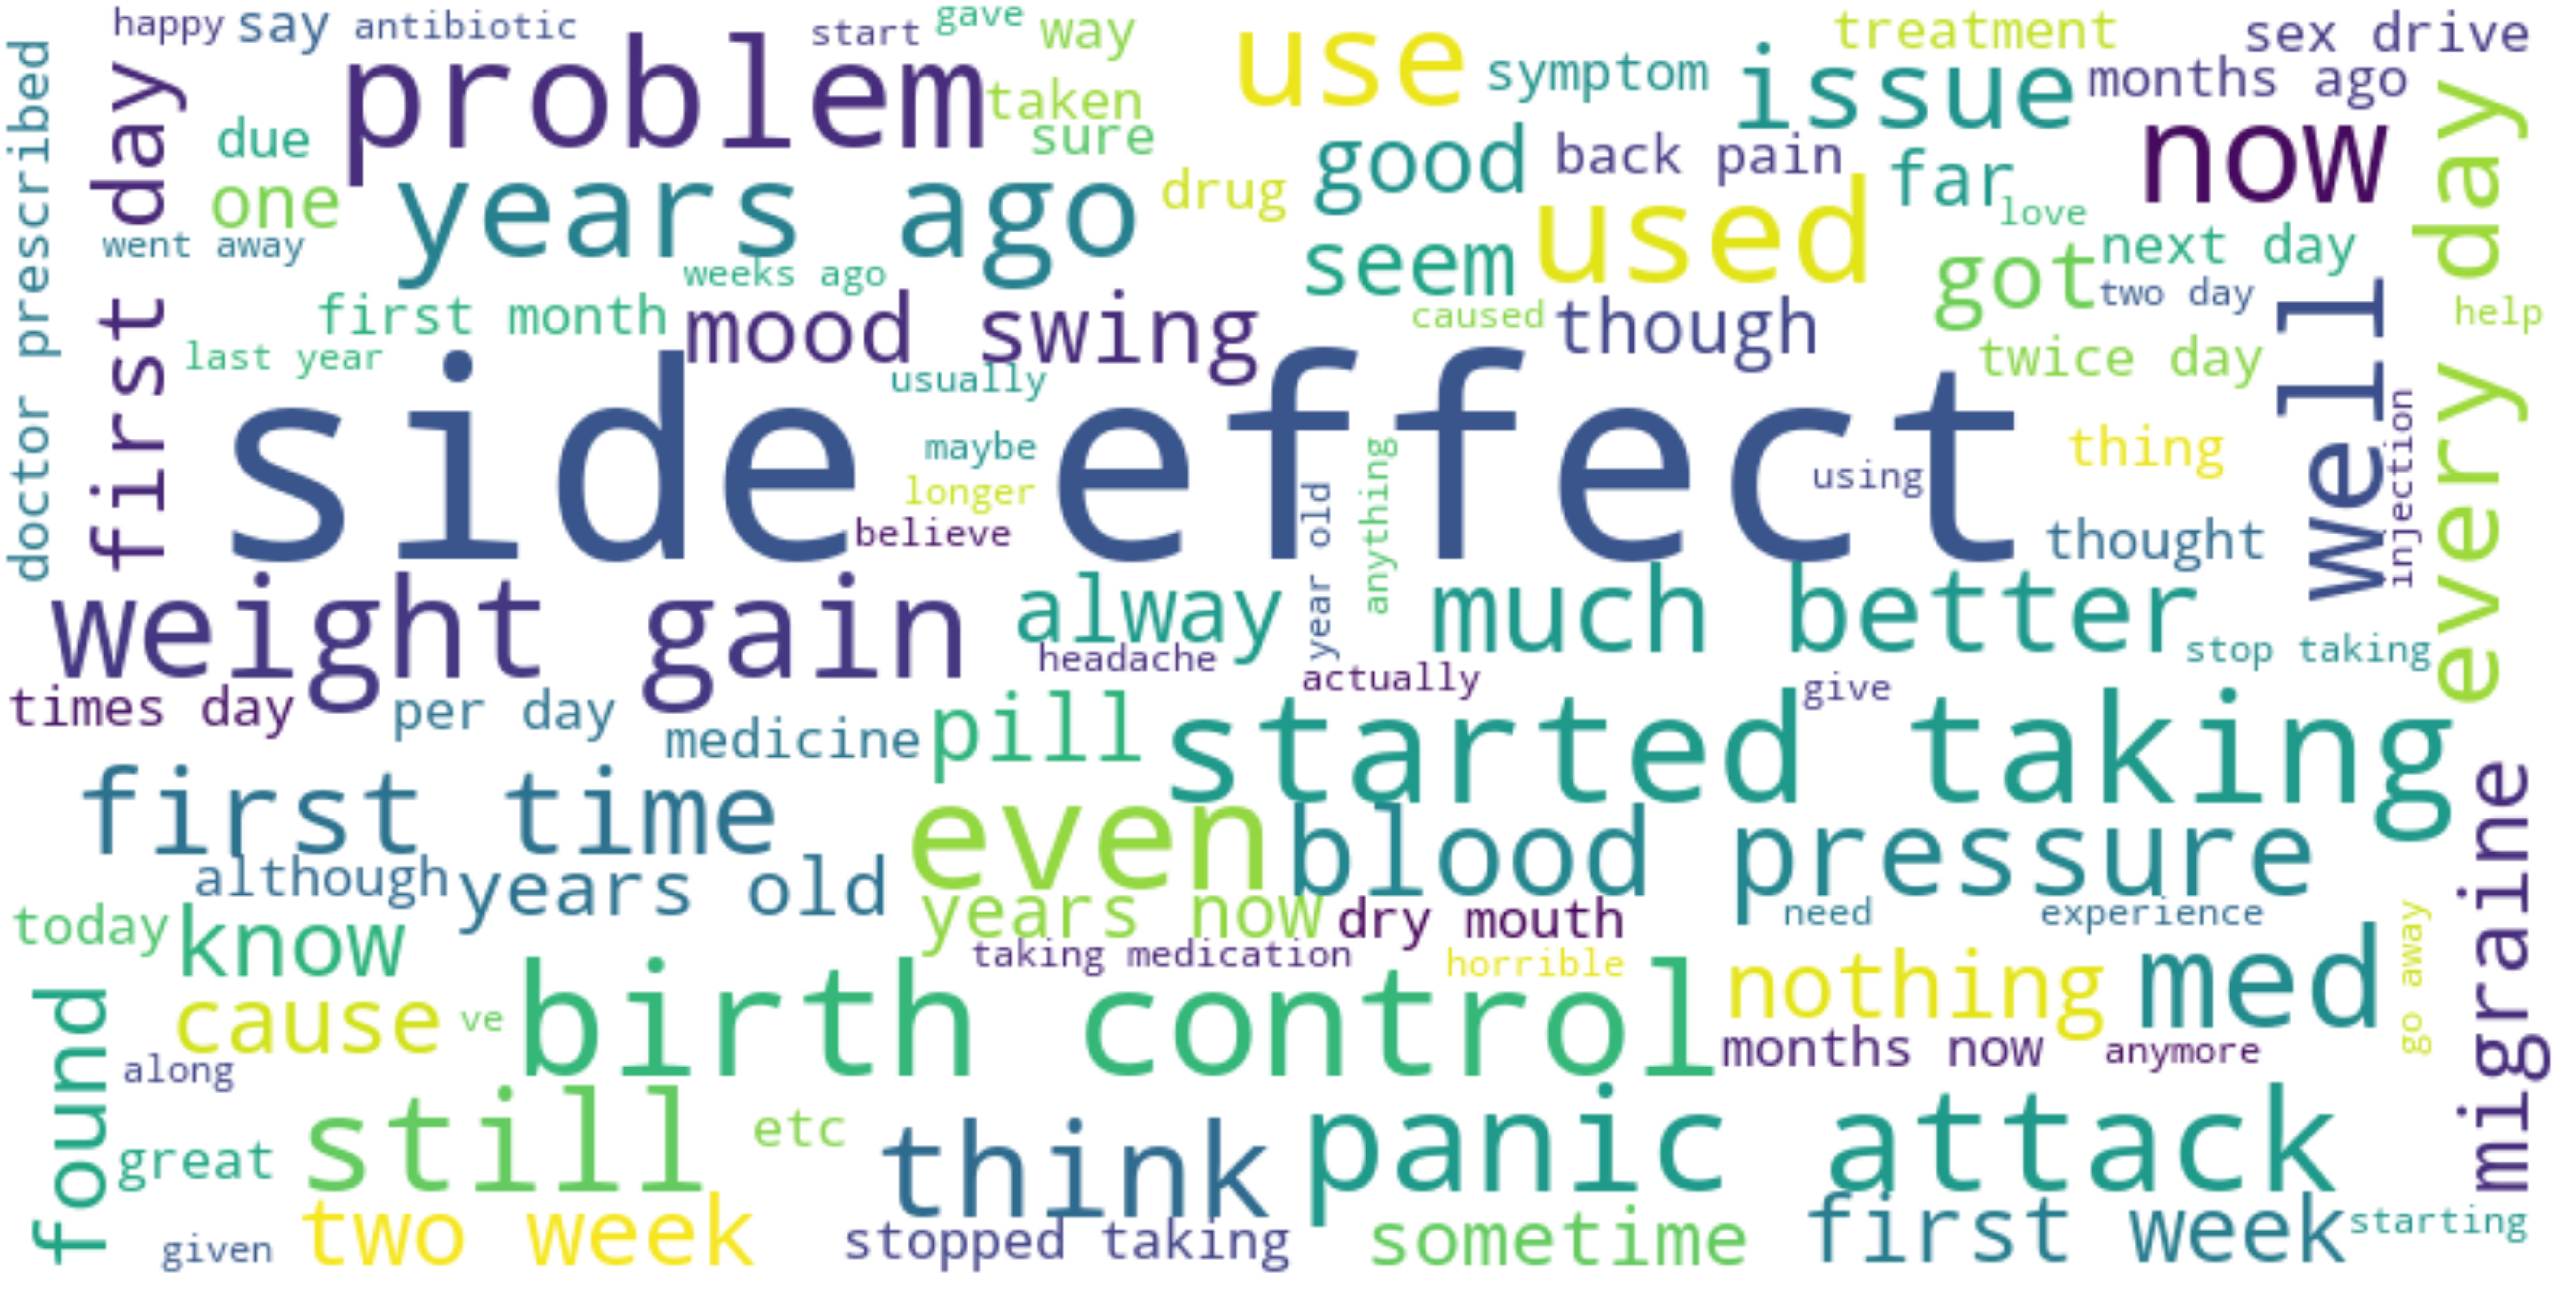

In [69]:
#wordcloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(100,50), facecolor='white')
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.savefig('Wordcloud.png')

In [89]:
len(df[df.condition=='Birth Control'])

9960